# Emotional Detector

**Importing Libraries**

In [35]:
import matplotlib.pyplot as plt
import os
from glob import glob as glob
import cv2
import random
from pylab import *

%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from keras.layers import BatchNormalization , Activation , MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint , ReduceLROnPlateau
from IPython.display import SVG , Image
from tensorflow.keras.utils import plot_model
import tensorflow as tf
print("TensorFlow Version" , tf.__version__)

TensorFlow Version 2.15.0


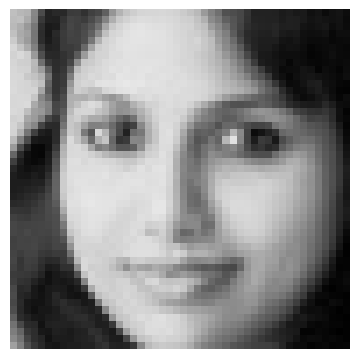

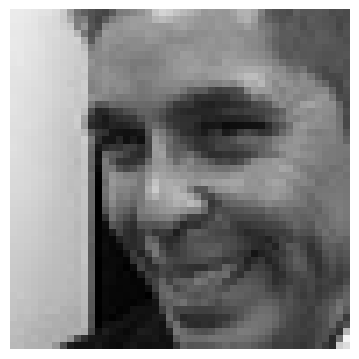

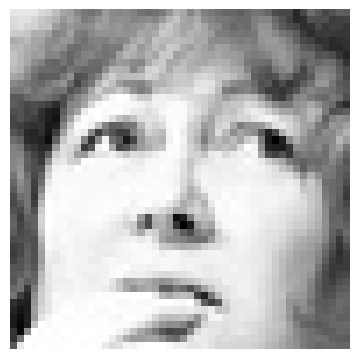

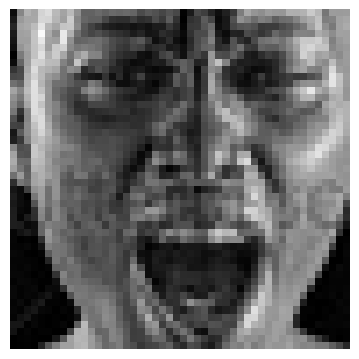

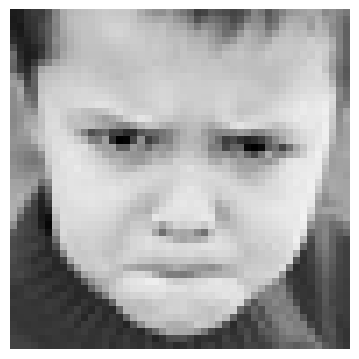

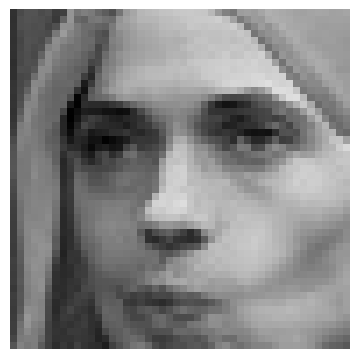

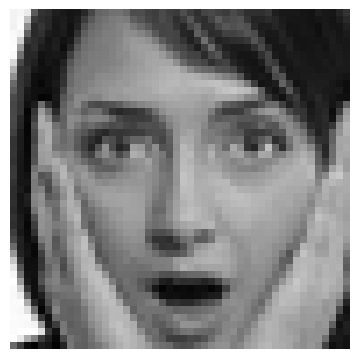

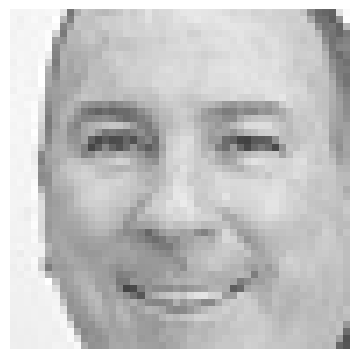

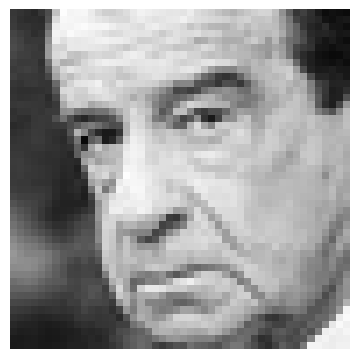

In [42]:
images = glob("train/**/**")
for i in range(9):
    image = choice(images)
    plt.figure(figsize=(15,15) )
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

# Preparing data for training

In [43]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/", target_size = (img_size, img_size) , color_mode = "grayscale" , batch_size = batch_size , class_mode = "categorical" , shuffle = True )

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/", target_size = (img_size, img_size) , color_mode = "grayscale" , batch_size = batch_size , class_mode = "categorical" , shuffle = True )


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# Defining Model

In [44]:
def Convolution(input_tensor , filters , kernel_size):
    x = Conv2D(filters = filters , kernel_size = kernel_size , padding = 'same')(input_tensor)
    x= BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size= (2,2))(x)
    x = Dropout(0.25)(x)
    return x

In [45]:
def Dense_f(input_tensor , nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    return x
    

In [46]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv1 = Convolution(inputs, 32 , (3,3))
    conv2 = Convolution(inputs, 64 , (5,5))
    conv3 = Convolution(inputs, 128 , (3,3))
    flatten = Flatten()(conv3)
    dense_1 = Dense_f(flatten , 256)
    output = Dense(7 , activation = "softmax")(dense_1)
    model = Model(inputs = [inputs] , outputs = [output])
    model.compile(loss = ['categorical_crossentropy'] , optimizer = 'adam' , metrics = ['accuracy'])
    return model

In [47]:
model = model_fer((48,48,1))
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_10 (Ba  (None, 48, 48, 128)       512       
 tchNormalization)                                               
                                                                 
 activation_10 (Activation)  (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 24, 24, 128)       0   

**Initializing the model**

In [48]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5" , monitor = 'val_accuracy' , save_weights_only = True , mode = 'max' , verbose = 1 )
callbacks = [checkpoint]

**Training the model**

In [49]:
history = model.fit(
x= train_generator,
steps_per_epoch = steps_per_epoch , 
epochs = epochs ,
validation_data = validation_generator , 
validation_steps = validation_steps , 
callbacks = callbacks
)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 1.6565 - accuracy: 0.3753
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 774s 2s/step - loss: 1.6565 - accuracy: 0.3753 - val_loss: 1.7842 - val_accuracy: 0.2835
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3582 - accuracy: 0.4851
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 199s 443ms/step - loss: 1.3582 - accuracy: 0.4851 - val_loss: 1.4422 - val_accuracy: 0.4527
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.2025 - accuracy: 0.5505
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 193s 432ms/step - loss: 1.2025 - accuracy: 0.5505 - val_loss: 1.4035 - val_accuracy: 0.4759
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.0747 - accuracy: 0.5989
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 192

# Model Evaluation

In [50]:
model.evaluate(validation_generator)

113/113 [==============================] - 9s 80ms/step - loss: 1.9246 - accuracy: 0.4834


[1.9245691299438477, 0.48342156410217285]

# Plotting Loss

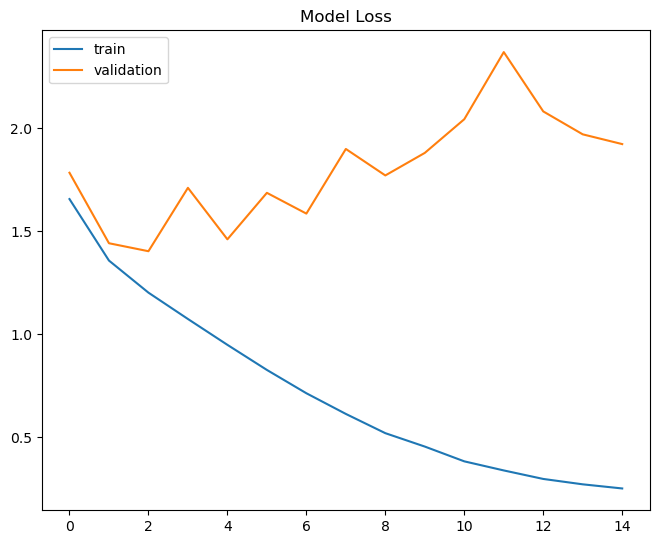

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['train' , 'validation'] , loc = 'upper left' )
plt.subplots_adjust(top = 1.0, bottom = 0.0 , right = 0.95 , left = 0.0 , hspace = 0.25 , wspace = 0.35)

In [52]:
model_json = model.to_json()
with open('model_a1.json' , 'w') as json_file:
    json_file.write(model_json)